In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.stattools import medcouple

In [3]:
from tqdm.notebook import tqdm
tqdm.pandas()

In [4]:
plt.rcParams["figure.figsize"] = [14, 4]
plt.rcParams["figure.autolayout"] = True

In [5]:
data_folder = '../data'

In [6]:
os.listdir(data_folder)

['id_itens_pai_com_variacao.csv',
 'tabela_ofertas_caneta.csv',
 'tabela_itens_caneta.csv',
 'tabela_ofertas_erros_conhecidos.csv',
 'tabela_vendas_caneta.csv']

In [7]:
ofertas_df = pd.read_csv(
    os.path.join(data_folder, 'tabela_ofertas_erros_conhecidos.csv'),
    parse_dates=['timestamp_evento'],
    encoding='utf-8',
)

In [8]:
ofertas_df.head(2)

,id_seller,id_oferta,id_item_pai,id_item_filho,preco_da_oferta,timestamp_evento,id_evento
0,6ukX0beUEyyVouWrLPT5t/wzpkeOdz15hvZIx7USzPI=,EIBUnHE4huMHjTRx+FpxVv9x8mKvEbJA+ZCEU1O+qWA=,/0IYmuEu5Kfr2s8bNIJ28cSZorGD3jlD/GoyW8m1V5c=,5b82U57bRLf6aUG3TqqAs1AdYJhH0KAoh1G/PW+PMJY=,2912.62,2022-01-31 12:07:14.111000+00:00,97346d0e360e2d13c5c57eb3335ffcc8
1,6ukX0beUEyyVouWrLPT5t/wzpkeOdz15hvZIx7USzPI=,EIBUnHE4huMHjTRx+FpxVv9x8mKvEbJA+ZCEU1O+qWA=,/0IYmuEu5Kfr2s8bNIJ28cSZorGD3jlD/GoyW8m1V5c=,5b82U57bRLf6aUG3TqqAs1AdYJhH0KAoh1G/PW+PMJY=,2912.62,2022-01-31 11:09:30.689000+00:00,8342df01d77b18a377c63ffc35e39bc9


In [9]:
ofertas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6444 entries, 0 to 6443
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   id_seller         6444 non-null   object             
 1   id_oferta         6444 non-null   object             
 2   id_item_pai       6444 non-null   object             
 3   id_item_filho     6444 non-null   object             
 4   preco_da_oferta   6444 non-null   float64            
 5   timestamp_evento  6444 non-null   datetime64[ns, UTC]
 6   id_evento         6444 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), object(5)
memory usage: 352.5+ KB


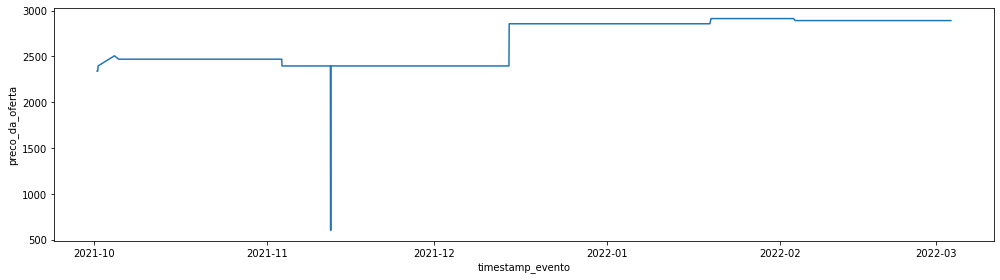

In [10]:
sns.lineplot(
    x="timestamp_evento", 
    y="preco_da_oferta",
    data=ofertas_df.query("id_item_pai == '/0IYmuEu5Kfr2s8bNIJ28cSZorGD3jlD/GoyW8m1V5c='")
);

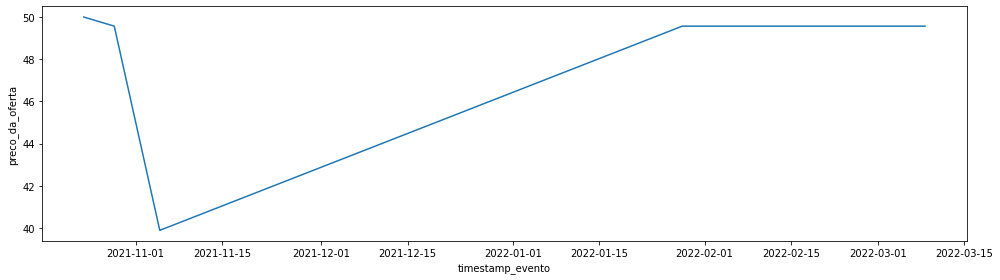

In [11]:
sns.lineplot(
    x="timestamp_evento", 
    y="preco_da_oferta",
    data=ofertas_df.query("id_item_pai == 'i3I357QQiIMvbqJ2y0W3RDt3ickYymIx0MvgwJEND0U='")
);

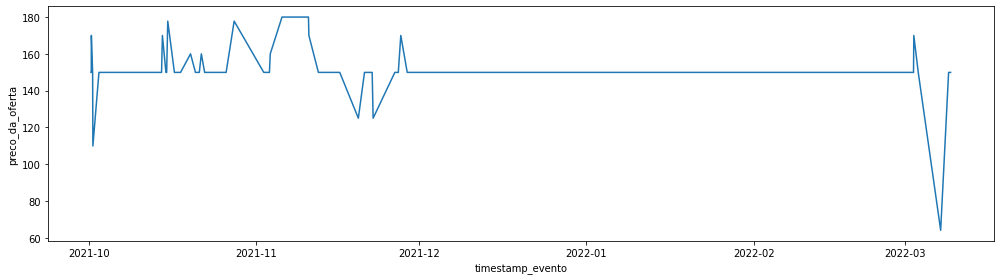

In [12]:
sns.lineplot(
    x="timestamp_evento", 
    y="preco_da_oferta",
    data=ofertas_df.query("id_item_pai == 'STJBl38jTibIRupvx+cvZvJVuyrbbe6bvwZgVERemPQ='")
);

# ITEM_PAI

In [13]:
ofertas_por_item_pai = ofertas_df.groupby(
    by = ['id_item_pai']
).agg([np.mean, np.std, 'count'])
ofertas_por_item_pai.fillna(0, inplace=True)

In [14]:
ofertas_por_item_pai['preco_da_oferta', 'cv'] = (
    (ofertas_por_item_pai['preco_da_oferta', 'std']/ofertas_por_item_pai['preco_da_oferta', 'mean']) * 100
)
ofertas_por_item_pai.head(2)

preco_da_oferta              \
                                                        mean         std   
id_item_pai                                                                
/0IYmuEu5Kfr2s8bNIJ28cSZorGD3jlD/GoyW8m1V5c=     2559.214783  407.225373   
1HYQswe7E6fFa1Nm/8/fawJyfloJWkShjdz1L3/V8SU=      366.867907    6.119809   

                                                               
                                             count         cv  
id_item_pai                                                    
/0IYmuEu5Kfr2s8bNIJ28cSZorGD3jlD/GoyW8m1V5c=    69  15.912122  
1HYQswe7E6fFa1Nm/8/fawJyfloJWkShjdz1L3/V8SU=    43   1.668123

In [15]:
len(ofertas_por_item_pai)

48

In [16]:
ofertas_por_item_pai_validas = ofertas_por_item_pai[
  (ofertas_por_item_pai[('preco_da_oferta', 'count')] >= 2) &
  (ofertas_por_item_pai[('preco_da_oferta', 'std')] != 0)
]
ofertas_por_item_pai_validas.head(2)

preco_da_oferta              \
                                                        mean         std   
id_item_pai                                                                
/0IYmuEu5Kfr2s8bNIJ28cSZorGD3jlD/GoyW8m1V5c=     2559.214783  407.225373   
1HYQswe7E6fFa1Nm/8/fawJyfloJWkShjdz1L3/V8SU=      366.867907    6.119809   

                                                               
                                             count         cv  
id_item_pai                                                    
/0IYmuEu5Kfr2s8bNIJ28cSZorGD3jlD/GoyW8m1V5c=    69  15.912122  
1HYQswe7E6fFa1Nm/8/fawJyfloJWkShjdz1L3/V8SU=    43   1.668123

In [17]:
len(ofertas_por_item_pai_validas)

39

In [18]:
itens_pai_com_variacao_no_preco_ofertado = ofertas_por_item_pai_validas.index.get_level_values('id_item_pai').to_list()

In [19]:
ofertas_candidatas_a_outliers_considerando_item_pai = ofertas_df.query(
    "id_item_pai in @itens_pai_com_variacao_no_preco_ofertado"
)
ofertas_candidatas_a_outliers_considerando_item_pai.head(2)

,id_seller,id_oferta,id_item_pai,id_item_filho,preco_da_oferta,timestamp_evento,id_evento
0,6ukX0beUEyyVouWrLPT5t/wzpkeOdz15hvZIx7USzPI=,EIBUnHE4huMHjTRx+FpxVv9x8mKvEbJA+ZCEU1O+qWA=,/0IYmuEu5Kfr2s8bNIJ28cSZorGD3jlD/GoyW8m1V5c=,5b82U57bRLf6aUG3TqqAs1AdYJhH0KAoh1G/PW+PMJY=,2912.62,2022-01-31 12:07:14.111000+00:00,97346d0e360e2d13c5c57eb3335ffcc8
1,6ukX0beUEyyVouWrLPT5t/wzpkeOdz15hvZIx7USzPI=,EIBUnHE4huMHjTRx+FpxVv9x8mKvEbJA+ZCEU1O+qWA=,/0IYmuEu5Kfr2s8bNIJ28cSZorGD3jlD/GoyW8m1V5c=,5b82U57bRLf6aUG3TqqAs1AdYJhH0KAoh1G/PW+PMJY=,2912.62,2022-01-31 11:09:30.689000+00:00,8342df01d77b18a377c63ffc35e39bc9


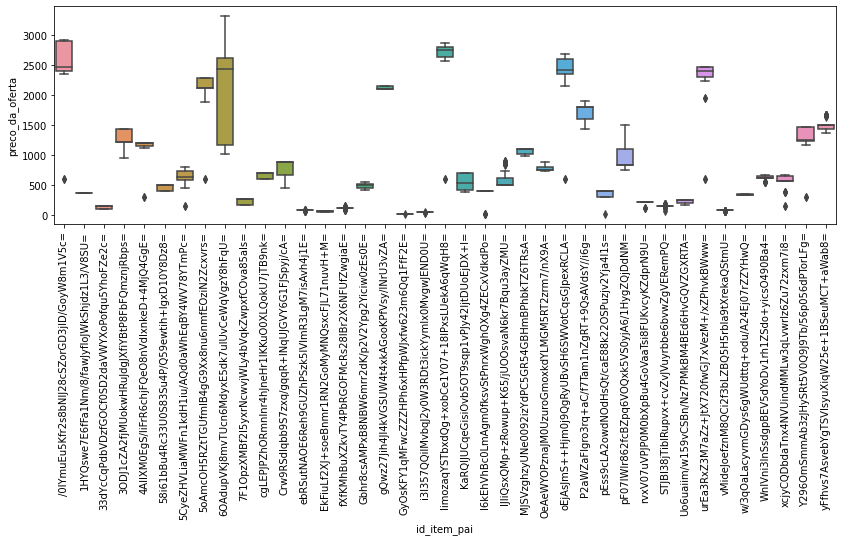

In [20]:
ax = sns.boxplot(
    x='id_item_pai',
    y="preco_da_oferta",
    data=ofertas_candidatas_a_outliers_considerando_item_pai
)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90);

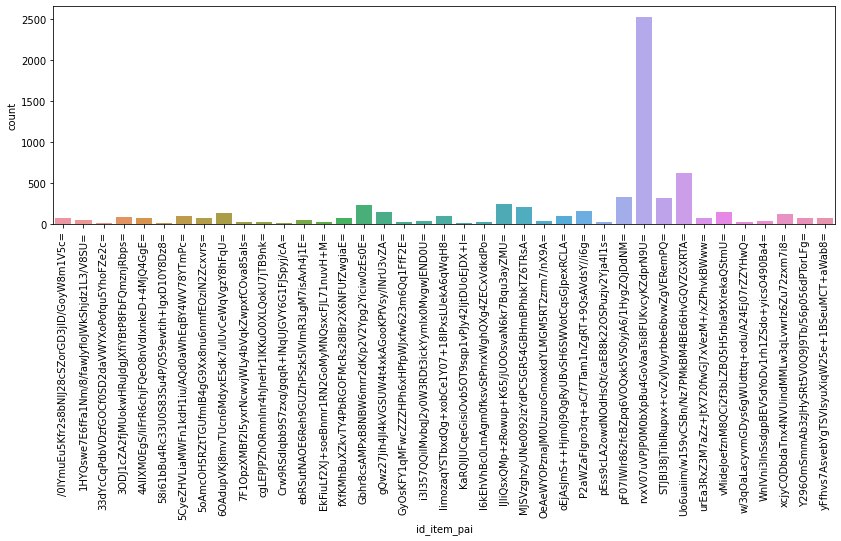

In [21]:
ax = sns.countplot(
    x='id_item_pai',
    data=ofertas_candidatas_a_outliers_considerando_item_pai,
)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90);

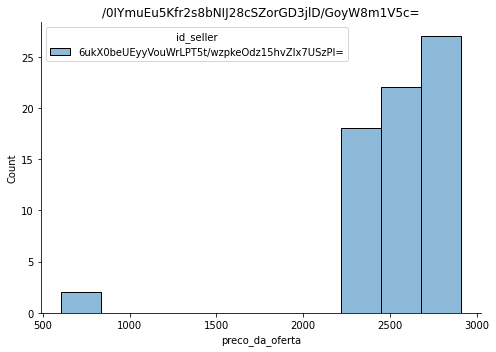

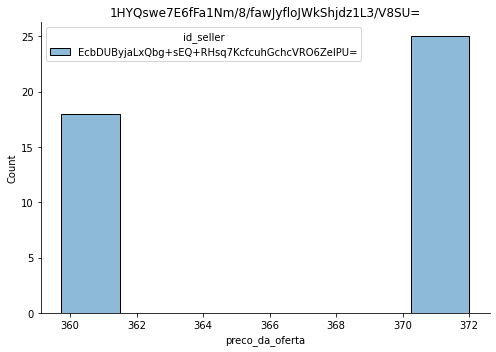

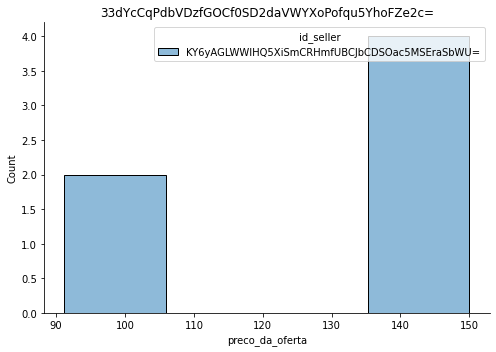

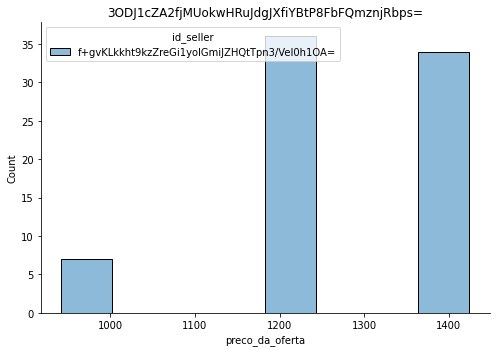

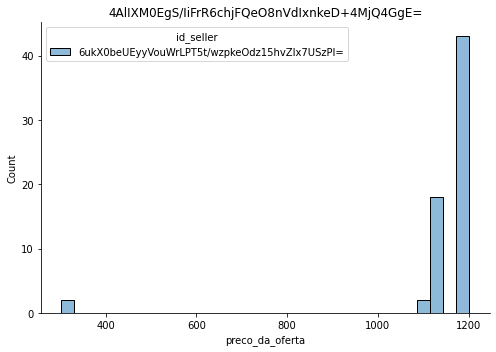

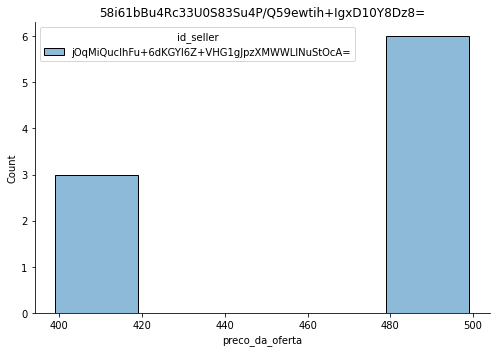

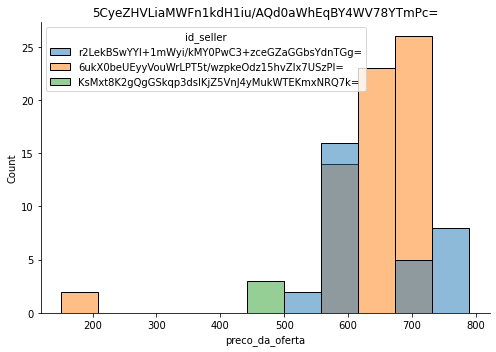

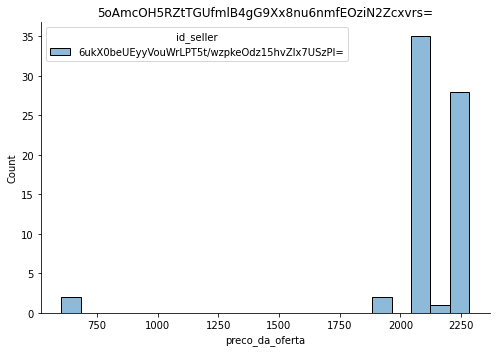

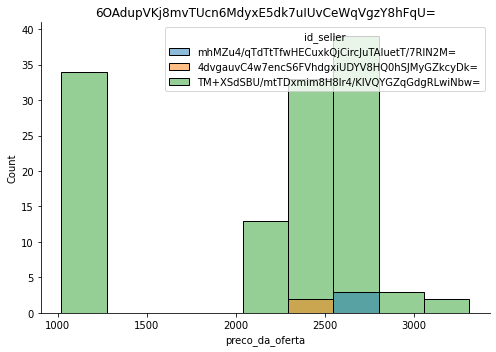

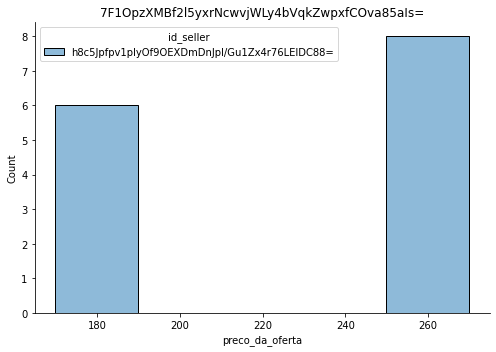

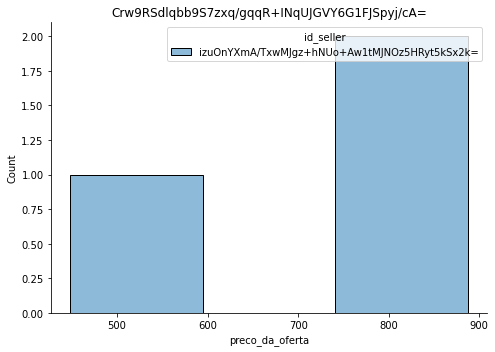

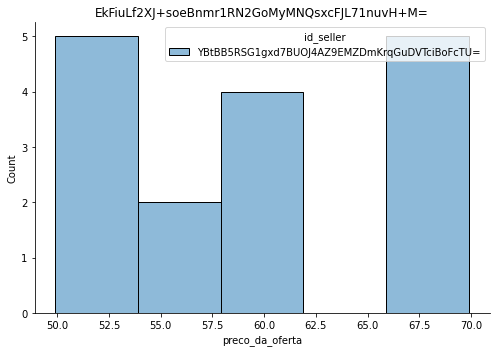

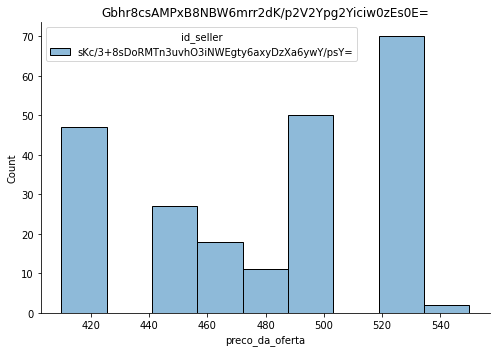

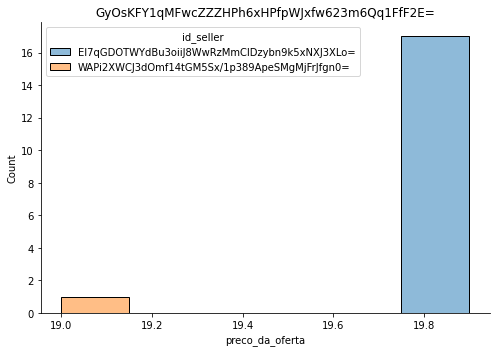

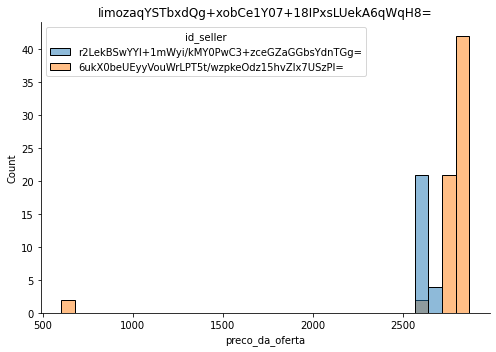

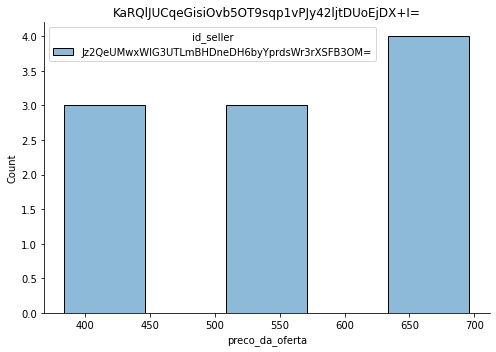

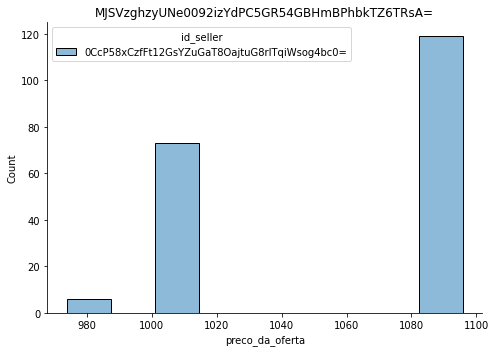

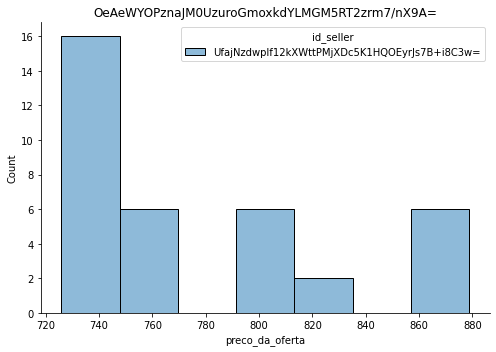

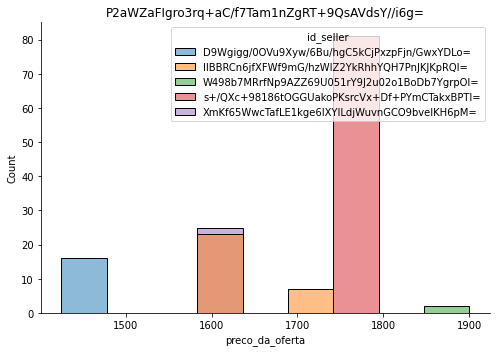

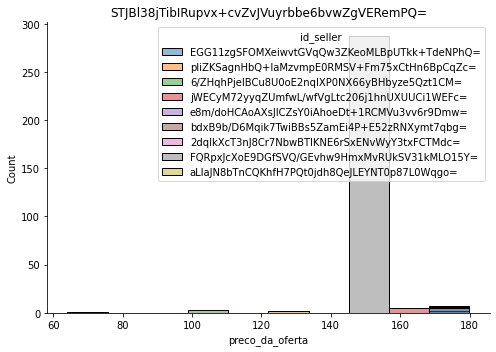

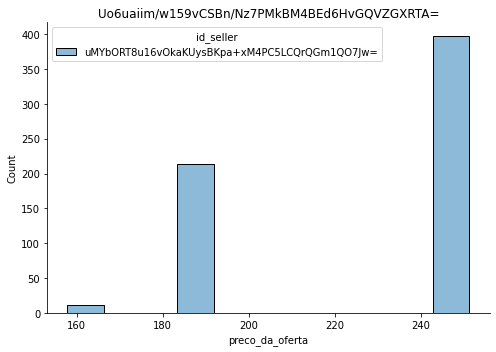

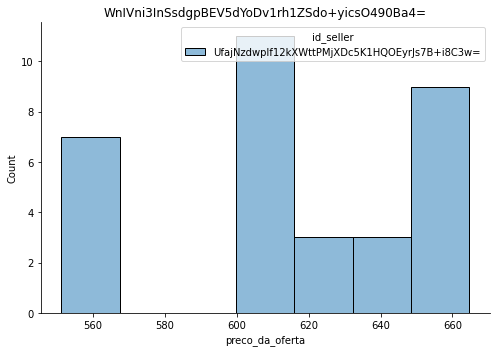

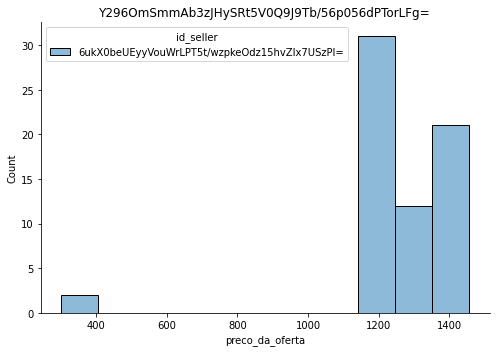

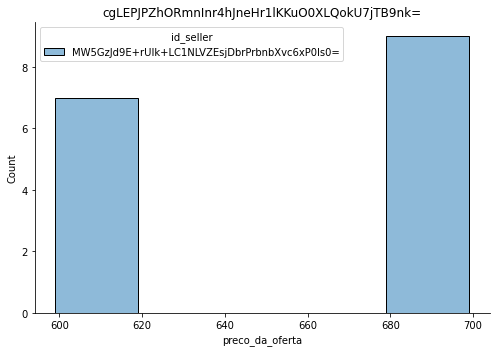

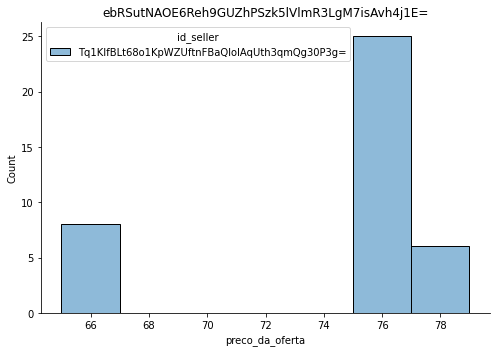

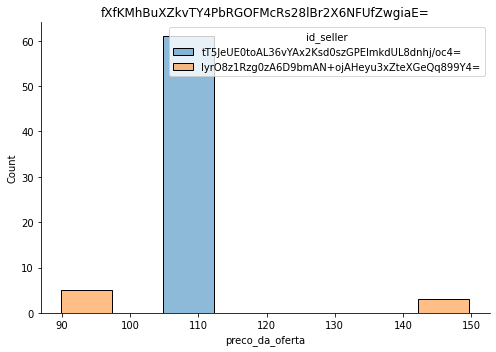

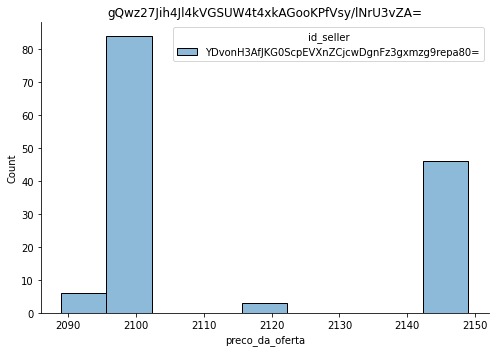

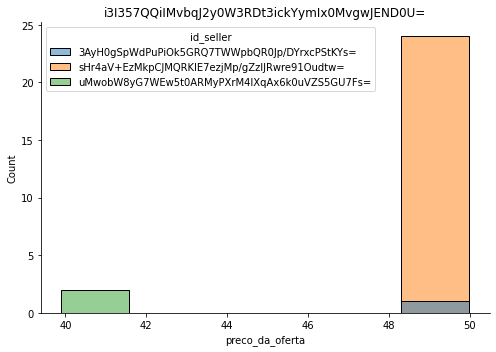

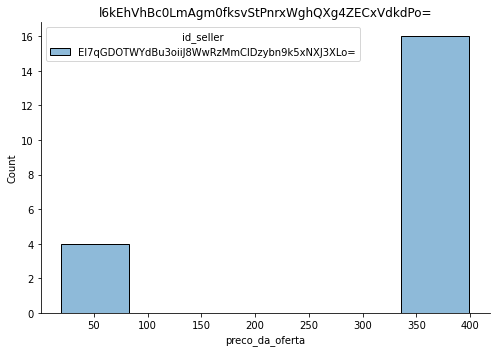

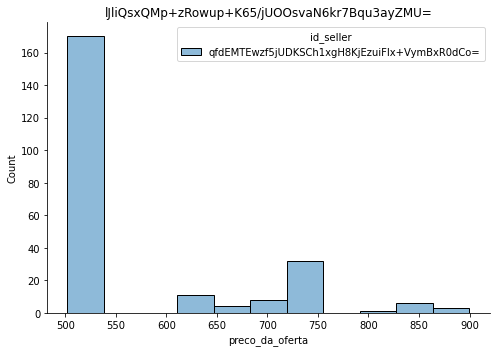

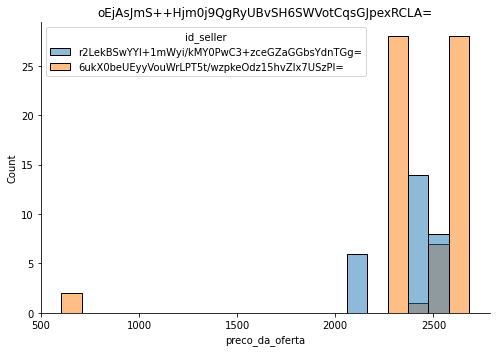

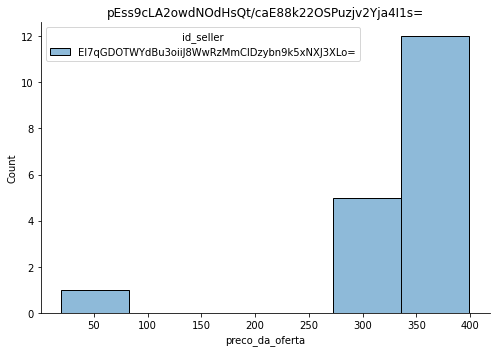

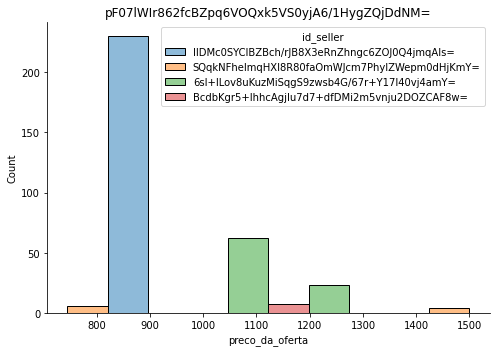

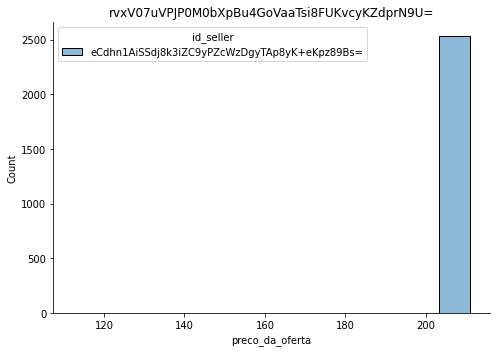

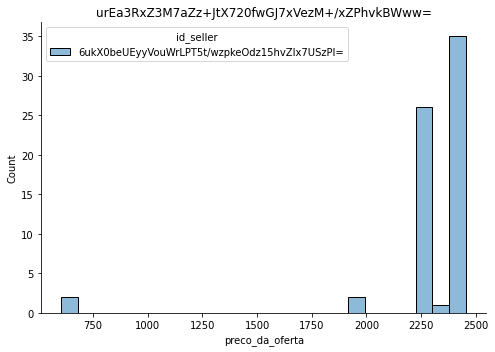

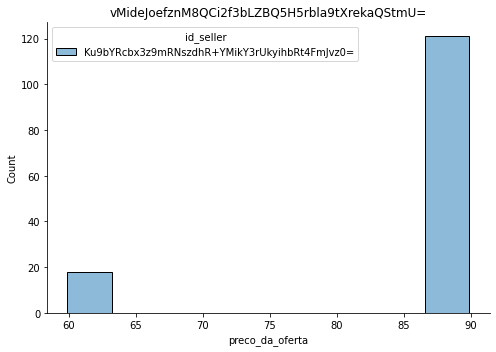

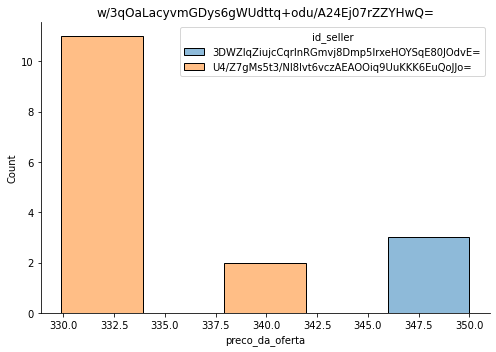

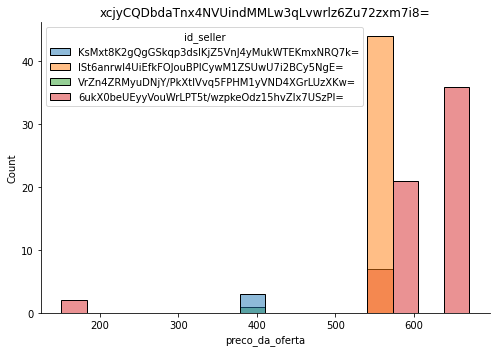

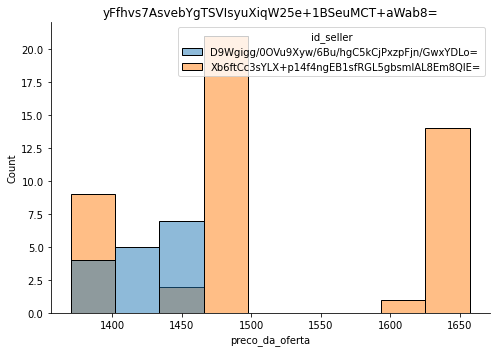

In [22]:
for id_item_pai in itens_pai_com_variacao_no_preco_ofertado:
    ofertas = ofertas_candidatas_a_outliers_considerando_item_pai.query("id_item_pai == @id_item_pai")
    
    f, ax = plt.subplots(figsize=(7, 5))
    ax.set_title(id_item_pai)
    sns.despine(f)
    
    sns.histplot(
        ofertas,
        x="preco_da_oferta",
        hue="id_seller"
    )

# Identificacao de Outliers

## Boxplot

In [23]:
boxplot = ofertas_candidatas_a_outliers_considerando_item_pai.groupby(
    by = ['id_item_pai']
)['preco_da_oferta'].describe()[['mean', 'std', 'count', '25%', '50%', '75%', 'min', 'max']]

boxplot['iqr'] = boxplot['75%'] - boxplot['25%']
boxplot['limite_inferior'] = boxplot['25%'] - (1.5 * boxplot['iqr'])
boxplot['limite_superior'] = boxplot['75%'] + (1.5 * boxplot['iqr'])
boxplot.head(2)

,mean,std,count,25%,50%,75%,min,max,iqr,limite_inferior,limite_superior
id_item_pai,,,,,,,,,,,
/0IYmuEu5Kfr2s8bNIJ28cSZorGD3jlD/GoyW8m1V5c=,2559.214783,407.225373,69.0,2396.16,2469.92,2890.92,603.74,2912.62,494.76,1654.02,3633.06
1HYQswe7E6fFa1Nm/8/fawJyfloJWkShjdz1L3/V8SU=,366.867907,6.119809,43.0,359.74,372.00,372.00,359.74,372.00,12.26,341.35,390.39


In [24]:
outliers = []

with tqdm(total=len(boxplot.index)) as pbar:
    for id_item_pai in boxplot.index:

        ofertas = ofertas_candidatas_a_outliers_considerando_item_pai.query(
            'id_item_pai == @id_item_pai'
        )

        for oferta in ofertas.itertuples():
            if oferta.preco_da_oferta > boxplot.loc[id_item_pai]['limite_superior'] or oferta.preco_da_oferta < boxplot.loc[id_item_pai]['limite_inferior']:
                outliers.append(oferta)
        
        pbar.update(1)
        
outliers_item_pai_boxplot = pd.DataFrame(outliers)
outliers_item_pai_boxplot.drop('Index', axis=1, inplace=True)
outliers_item_pai_boxplot.head(2)

  0%|          | 0/39 [00:00<?, ?it/s]

,id_seller,id_oferta,id_item_pai,id_item_filho,preco_da_oferta,timestamp_evento,id_evento
0,6ukX0beUEyyVouWrLPT5t/wzpkeOdz15hvZIx7USzPI=,EIBUnHE4huMHjTRx+FpxVv9x8mKvEbJA+ZCEU1O+qWA=,/0IYmuEu5Kfr2s8bNIJ28cSZorGD3jlD/GoyW8m1V5c=,5b82U57bRLf6aUG3TqqAs1AdYJhH0KAoh1G/PW+PMJY=,603.74,2021-11-12 10:58:44.502000+00:00,d2ece905126ecc1153f97ff67b797dc3
1,6ukX0beUEyyVouWrLPT5t/wzpkeOdz15hvZIx7USzPI=,EIBUnHE4huMHjTRx+FpxVv9x8mKvEbJA+ZCEU1O+qWA=,/0IYmuEu5Kfr2s8bNIJ28cSZorGD3jlD/GoyW8m1V5c=,5b82U57bRLf6aUG3TqqAs1AdYJhH0KAoh1G/PW+PMJY=,603.74,2021-11-12 12:06:49.763000+00:00,8ef47e010830272ec9298a29bc051958


## Boxplot ajustado

In [25]:
boxplot_ajustado = ofertas_candidatas_a_outliers_considerando_item_pai.groupby(
    by = ['id_item_pai']
)['preco_da_oferta'].agg(
    [
        lambda x : medcouple(x.values), 
        lambda x : np.percentile(x.values, 25),
        lambda x : np.percentile(x.values, 75)
    ]
)

boxplot_ajustado.rename(
    columns={
        '<lambda_0>': 'mc',
        '<lambda_1>': 'q1',
        '<lambda_2>': 'q3',
    },
    inplace=True
)
boxplot_ajustado['iqr'] = boxplot_ajustado['q3'] - boxplot_ajustado['q1']

boxplot_ajustado['limite_inferior'] = boxplot_ajustado.apply(
    lambda x: (x.q1 - (1.5 * np.exp(-4*x.mc) * x.iqr)) if x.mc >= 0 else (x.q1 - (1.5 * np.exp(-3*x.mc) * x.iqr)), 
    axis = 1
)

boxplot_ajustado['limite_superior'] = boxplot_ajustado.apply(
    lambda x: (x.q3 + (1.5 * np.exp(3*x.mc) * x.iqr)) if x.mc >= 0 else (x.q3 + (1.5 * np.exp(4*x.mc) * x.iqr)), 
    axis = 1
)
boxplot_ajustado.head(2)

,mc,q1,q3,iqr,limite_inferior,limite_superior
id_item_pai,,,,,,
/0IYmuEu5Kfr2s8bNIJ28cSZorGD3jlD/GoyW8m1V5c=,0.701835,2396.16,2890.92,494.76,2351.360500,8984.820332
1HYQswe7E6fFa1Nm/8/fawJyfloJWkShjdz1L3/V8SU=,-1.000000,359.74,372.00,12.26,-9.633024,372.336825


In [26]:
outliers = []

with tqdm(total=len(boxplot_ajustado.index)) as pbar:
    for id_item_pai in boxplot_ajustado.index:

        ofertas = ofertas_candidatas_a_outliers_considerando_item_pai.query(
            'id_item_pai == @id_item_pai'
        )

        for oferta in ofertas.itertuples():
            if oferta.preco_da_oferta > boxplot_ajustado.loc[id_item_pai]['limite_superior'] or oferta.preco_da_oferta < boxplot_ajustado.loc[id_item_pai]['limite_inferior']:
                outliers.append(oferta)
        
        pbar.update(1)
        
outliers_item_pai_boxplot_ajustado = pd.DataFrame(outliers)
outliers_item_pai_boxplot_ajustado.drop('Index', axis=1, inplace=True)
outliers_item_pai_boxplot_ajustado.head(2)

  0%|          | 0/39 [00:00<?, ?it/s]

,id_seller,id_oferta,id_item_pai,id_item_filho,preco_da_oferta,timestamp_evento,id_evento
0,6ukX0beUEyyVouWrLPT5t/wzpkeOdz15hvZIx7USzPI=,EIBUnHE4huMHjTRx+FpxVv9x8mKvEbJA+ZCEU1O+qWA=,/0IYmuEu5Kfr2s8bNIJ28cSZorGD3jlD/GoyW8m1V5c=,5b82U57bRLf6aUG3TqqAs1AdYJhH0KAoh1G/PW+PMJY=,2339.74,2021-10-01 14:32:47.113000+00:00,a08c519d95e98ef47d9ff0300efed24b
1,6ukX0beUEyyVouWrLPT5t/wzpkeOdz15hvZIx7USzPI=,EIBUnHE4huMHjTRx+FpxVv9x8mKvEbJA+ZCEU1O+qWA=,/0IYmuEu5Kfr2s8bNIJ28cSZorGD3jlD/GoyW8m1V5c=,5b82U57bRLf6aUG3TqqAs1AdYJhH0KAoh1G/PW+PMJY=,2339.74,2021-10-01 17:39:13.383000+00:00,2bb8ad1db3e25c2007c06a9b9df9f3b3


# Validacao

In [27]:
outilier = '/0IYmuEu5Kfr2s8bNIJ28cSZorGD3jlD/GoyW8m1V5c=' #base erros conhecidos 1
# outilier = 'i3I357QQiIMvbqJ2y0W3RDt3ickYymIx0MvgwJEND0U=' #base erros conhecidos 2
# outilier = 'STJBl38jTibIRupvx+cvZvJVuyrbbe6bvwZgVERemPQ=' #base erros conhecidos 3

## Boxplot

In [28]:
len(outliers_item_pai_boxplot)

139

In [29]:
outilier in outliers_item_pai_boxplot['id_item_pai'].to_list()

True

## Boxplot ajustado

In [30]:
len(outliers_item_pai_boxplot_ajustado)

176

In [31]:
outilier in outliers_item_pai_boxplot_ajustado['id_item_pai'].to_list()

True